In [112]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sb

In [148]:
# Load Data (up until 2018)
df = pd.read_csv('Benchmark_df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39828 entries, 0 to 39827
Data columns (total 67 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              39828 non-null  int64  
 1   NUTS_ID                           39828 non-null  object 
 2   sector                            39828 non-null  object 
 3   area                              0 non-null      float64
 4   employment                        38604 non-null  float64
 5   gdp                               39656 non-null  float64
 6   GVA                               39662 non-null  float64
 7   population                        39600 non-null  float64
 8   Total_GVA                         39656 non-null  float64
 9   GVA_share                         39622 non-null  float64
 10  employment_rate                   38206 non-null  float64
 11  GVAperPOP                         39390 non-null  float64
 12  GVAg

In [149]:
# View List of Columns
df.columns

Index(['year', 'NUTS_ID', 'sector', 'area', 'employment', 'gdp', 'GVA',
       'population', 'Total_GVA', 'GVA_share', 'employment_rate', 'GVAperPOP',
       'GVAgrowth', 'GVAgrowth_LTA', 'GVAgrowth_Anomaly', 'LF_average_a',
       'LF_std_a', 'LF_max_a', 'LF_LTA_mean', 'LF_LTA_std', 'LF_LTA_max',
       'LF_Average_Deviation_LTA', 'maxTemp_MEDIAN', 'median_intensity',
       'MEDIAN_spa01', 'MEDIAN_spa03', 'MEDIAN_spa06', 'MEDIAN_spa12',
       'SMA_MEDIAN_mean', 'SMA_MEDIAN_std', 'SMA_MEDIAN_count',
       'SMA_MEDIAN_max', 'SMA_MEDIAN_min', 'SMA_MEDIAN_LTA_mean',
       'SMA_MEDIAN_LTA_std', 'SMA_MEDIAN_LTA_min', 'SMA_MEDIAN_LTA_max',
       'SMA_MEDIAN_Average_Deviation_LTA', 'Heat_MildDrought_Short_Sum',
       'Heat_ModerateDrought_Short_Sum', 'Heat_SevereDrought_Short_Sum',
       'Heat_ExtremeDrought_Short_Sum', 'Heat_MildDrought_Long_Sum',
       'Heat_ModerateDrought_Long_Sum', 'Heat_SevereDrought_Long_Sum',
       'Heat_ExtremeDrought_Long_Sum', 'HeatWave_Count_Sum',
       

In [150]:
# View Sector Types
df['sector'].unique()

array(['A', 'C'], dtype=object)

In [151]:
# Drop Irrelevant Variables
df = df.drop(['year', 'NUTS_ID', 'area', 'MOUNT_TYPE', 'URBN_TYPE', 'COAST_TYPE'], axis=1)

In [152]:
# Drop Missing Values in Gross Value Added
df = df.dropna(subset=['GVA'])

In [153]:
# Quick Look at the Data
df.describe()

employment            gdp           GVA    population      Total_GVA  \
count  38438.000000   39656.000000  39662.000000  39594.000000   39656.000000   
mean      17.619266    9378.581637    794.064964    376.327289    8401.627490   
std       25.354855   16544.065140   1561.979006    447.327605   14866.489455   
min        0.000000       0.000000   -372.900000      0.000000       0.000000   
25%        3.040000    2450.200000     79.875000    134.860000    2178.407500   
50%        9.500000    4690.320000    270.705000    250.240000    4192.980000   
75%       21.780000    9550.815000    834.597500    460.010000    8581.675000   
max      553.800000  237283.430000  53012.390000   6586.700000  210783.010000   

          GVA_share  employment_rate     GVAperPOP     GVAgrowth  \
count  39622.000000     38200.000000  39390.000000  3.702600e+04   
mean       0.116748         0.053950      2.431946           inf   
std        0.111441         0.050697      3.921665           NaN   
min       -0.068791         0.000000     -0.966627 -3.157147e+00   
25%        0.023569         0.015437      0.386708 -4.749511e-02   
50%        0.080446         0.040978      0.981001  2.374806e-02   
75%        0.191327         0.078103      3.361380  9.434285e-02   
max        0.771869         0.553979    127.404015           inf   

       GVAgrowth_LTA  ...  Heat_ExtremeDrought_Long     fapar_std  \
count   38142.000000  ...               39288.00000  15686.000000   
mean        0.030754  ...                   0.00280      0.657137   
std         0.054475  ...                   0.05284      0.187648   
min        -0.058824  ...                   0.00000      0.169912   
25%         0.003313  ...                   0.00000      0.523801   
50%         0.018422  ...                   0.00000      0.639558   
75%         0.040608  ...                   0.00000      0.773441   
max         1.362398  ...                   1.00000      1.537698   

         fapar_mean  fapar_median     fapar_min  fapar_low_months  \
count  15686.000000  15686.000000  15686.000000      15686.000000   
mean       0.187361      0.209779     -0.877137          0.711590   
std        0.351601      0.389369      0.502270          1.132453   
min       -1.814167     -1.895500     -3.037000          0.000000   
25%       -0.044636     -0.033000     -1.242000          0.000000   
50%        0.212390      0.235750     -0.849500          0.000000   
75%        0.433417      0.474500     -0.520000          1.000000   
max        1.722857      1.715000      1.098000         12.000000   

       fapar_severe_low_months  NN_MEDIAN_spa01  NN_LF_average_a  \
count             15686.000000     38200.000000     37350.000000   
mean                  0.012368         1.802341         0.117710   
std                   0.129638         0.010336         0.049705   
min                   0.000000         1.781656         0.000000   
25%                   0.000000         1.795702         0.083595   
50%                   0.000000         1.799933         0.115221   
75%                   0.000000         1.806395         0.150787   
max                   5.000000         1.838473         0.358207   

       NN_median_intensity  
count         38200.000000  
mean              2.056002  
std               0.302703  
min               1.127054  
25%               1.824993  
50%               2.067850  
75%               2.320225  
max               2.775429  

[8 rows x 60 columns]

In [154]:
# Seperate Datasets by Agriculture and Industry
df_ag = df[df['sector'] == 'A']
df_ag = df_ag.drop('sector', axis=1)
print('Agriculture Dataframe Size :', df_ag.shape)

df_ind = df[df['sector'] == 'C']
df_ind = df_ind.drop('sector', axis=1)
print('Industry Dataframe Size :', df_ind.shape)

Agriculture Dataframe Size : (19834, 60)
Industry Dataframe Size : (19828, 60)


## Economic Variable Correlations

Agriculture Economic Data


<Axes: >

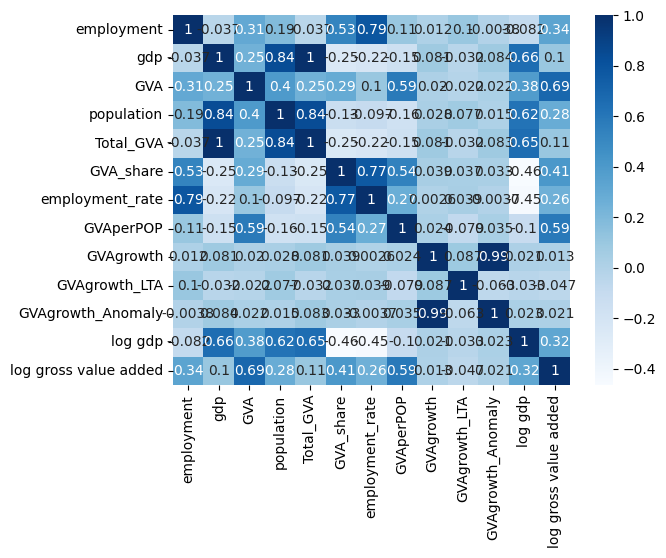

In [155]:
# Check Correlation Between Economic Variables

print('Agriculture Economic Data')
df_ag['log gdp'] = np.log(df_ag['gdp'] + 0.001)
df_ag['log gross value added'] = np.log(np.power(df_ag['GVA'], 2) + 0.001)
corr_ag_econ = df_ag[['employment', 'gdp', 'GVA',
       'population', 'Total_GVA', 'GVA_share', 'employment_rate', 'GVAperPOP',
       'GVAgrowth', 'GVAgrowth_LTA', 'GVAgrowth_Anomaly', 'log gdp', 'log gross value added']].corr()
sb.heatmap(corr_ag_econ, cmap="Blues", annot=True)


Industrial Economic Data


<Axes: >

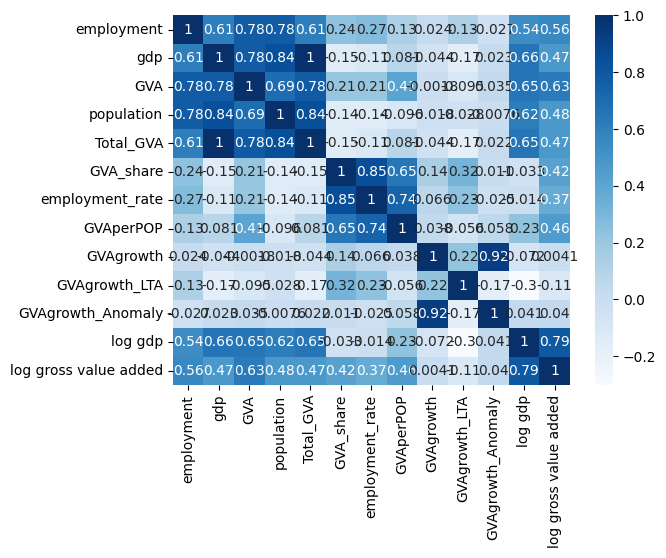

In [156]:
print('Industrial Economic Data')
df_ind['log gdp'] = np.log(df_ind['gdp'] + 0.001)
df_ind['log gross value added'] = np.log(np.power(df_ind['GVA'], 2) + 0.001)
corr_ind_econ = df_ind[['employment', 'gdp', 'GVA',
       'population', 'Total_GVA', 'GVA_share', 'employment_rate', 'GVAperPOP',
       'GVAgrowth', 'GVAgrowth_LTA', 'GVAgrowth_Anomaly', 'log gdp', 'log gross value added']].corr()
sb.heatmap(corr_ind_econ, cmap="Blues", annot=True)

In [16]:
## Climate Variable Correlations

Heat Data


<Axes: >

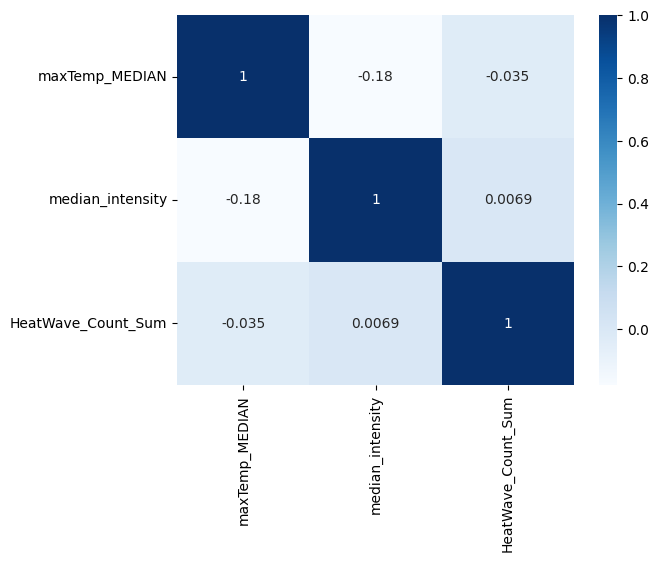

In [157]:
# Check Correlation Between Heat Variables
df_ag_heat =df_ag[~df_ag['HeatWave_Count_Sum'].isna()]

print('Heat Data')
corr_ag_heat = df_ag_heat[['maxTemp_MEDIAN', 'median_intensity', 'HeatWave_Count_Sum']].corr()
sb.heatmap(corr_ag_heat, cmap="Blues", annot=True)

In [141]:
# test
# len(df_ag_heat[df_ag_heat['HeatWave_Count_Sum'] == 12]) == len(df_ag)
# df[['year','median_intensity', 'maxTemp_MEDIAN', 'HeatWave_Count_Sum']][df['NUTS_ID'] == 'AT111']
# df_ag_heat['HeatWave_Count_Sum'][df_ag_heat['HeatWave_Count_Sum'] != 12]

Low Flow Index Data


<Axes: >

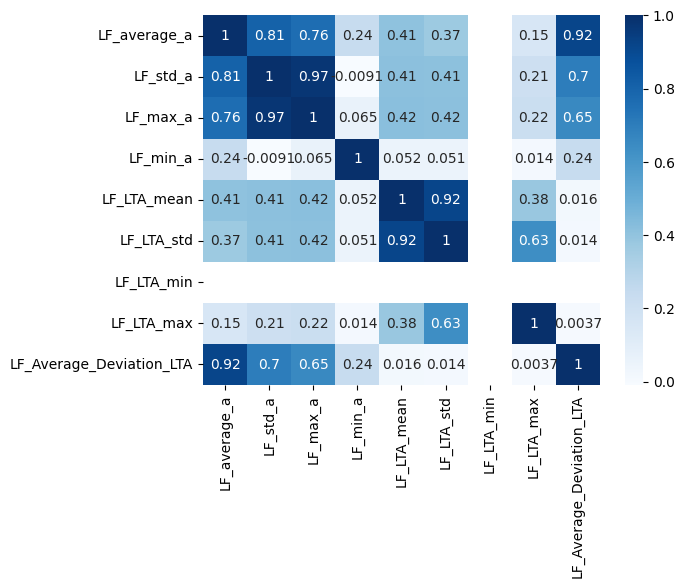

In [158]:
# Check Correlation Between Low Flow Index Variables
df_ag_lf =df_ag_lf[~df_ag_lf['LF_LTA_min'].isna()]

print('Low Flow Index Data')
corr_ag_lf = df_ag_lf[['LF_average_a', 'LF_std_a',  'LF_max_a', 'LF_min_a',
       'LF_LTA_mean', 'LF_LTA_std', 'LF_LTA_min', 'LF_LTA_max', 'LF_Average_Deviation_LTA']].corr()
sb.heatmap(corr_ag_lf, cmap="Blues", annot=True)

In [159]:
# LF_LTA_min is constant
len(df_ag_lf[df_ag_lf['LF_LTA_min'] == 0]) == len(df_ag_lf)

True

Standard Precipitation Index Data


<Axes: >

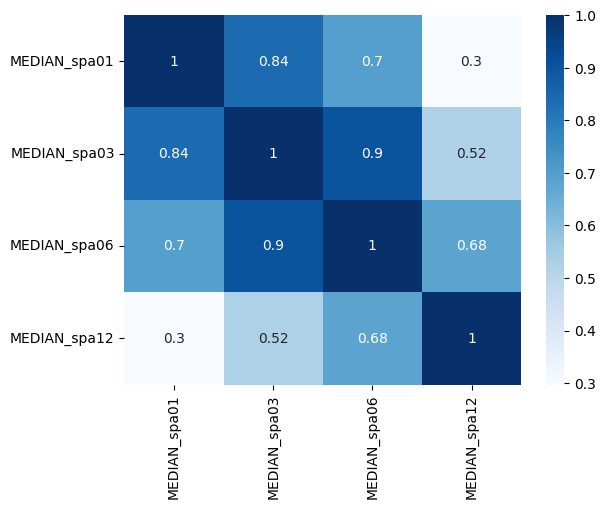

In [160]:
# Check Correlation Between Standard Precipitation Index Variables

print('Standard Precipitation Index Data')
corr_ag_spa = df_ag[['MEDIAN_spa01', 'MEDIAN_spa03', 'MEDIAN_spa06', 'MEDIAN_spa12']].corr()
sb.heatmap(corr_ag_spa, cmap="Blues", annot=True)

Soil Moisture Anomaly Data


<Axes: >

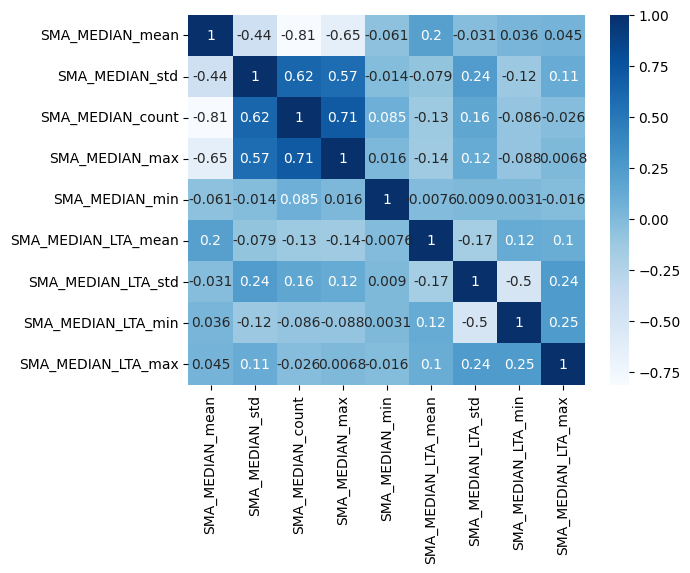

In [161]:
# Check Correlation Between Soil Moisture Anomaly
df_ag_sma =df_ag[~df_ag['SMA_MEDIAN_count'].isna()] 

print('Soil Moisture Anomaly Data')
corr_ag_sma = df_ag_sma[['SMA_MEDIAN_mean', 'SMA_MEDIAN_std', 'SMA_MEDIAN_count',
       'SMA_MEDIAN_max', 'SMA_MEDIAN_min', 'SMA_MEDIAN_LTA_mean',
       'SMA_MEDIAN_LTA_std', 'SMA_MEDIAN_LTA_min', 'SMA_MEDIAN_LTA_max']].corr()
sb.heatmap(corr_ag_sma, cmap="Blues", annot=True)

Heat and Drought Short Data


<Axes: >

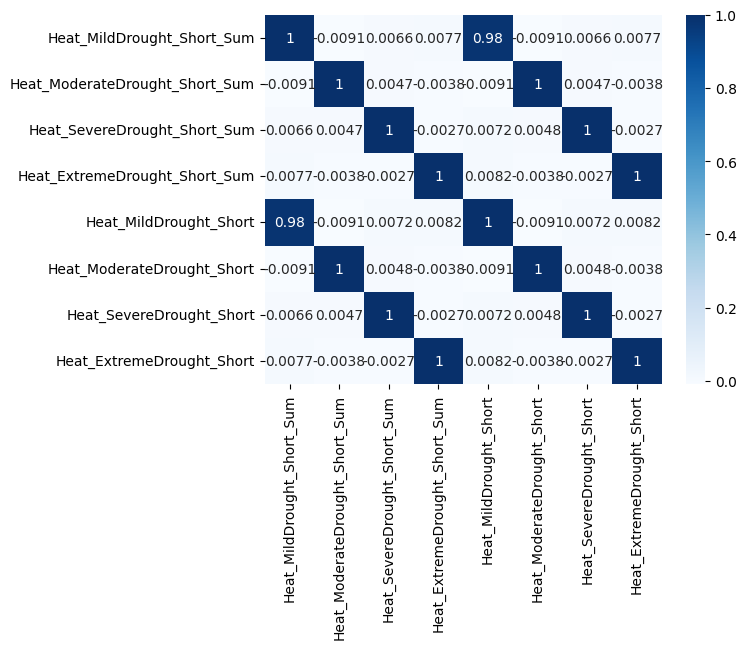

In [163]:
# Check Correlation Between Combined Heat and Drought Short Variables

print('Heat and Drought Short Data')
corr_ag_hd_short = df_ag[['Heat_MildDrought_Short_Sum',
       'Heat_ModerateDrought_Short_Sum', 'Heat_SevereDrought_Short_Sum',
       'Heat_ExtremeDrought_Short_Sum', 
       'Heat_MildDrought_Short', 'Heat_ModerateDrought_Short',
       'Heat_SevereDrought_Short', 'Heat_ExtremeDrought_Short']].corr()
sb.heatmap(corr_ag_hd_short, cmap="Blues", annot=True)

Heat and Drought Long Data


<Axes: >

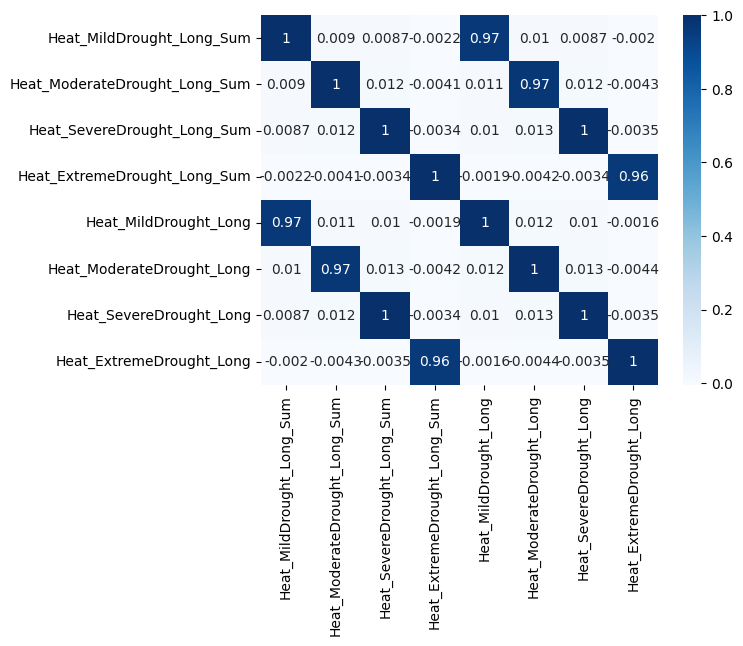

In [164]:
# Check Correlation Between Combined Heat and Drought Long Variables

print('Heat and Drought Long Data')
corr_ag_hd_long = df_ag[['Heat_MildDrought_Long_Sum',
       'Heat_ModerateDrought_Long_Sum', 'Heat_SevereDrought_Long_Sum',
       'Heat_ExtremeDrought_Long_Sum', 
       'Heat_MildDrought_Long', 'Heat_ModerateDrought_Long',
       'Heat_SevereDrought_Long', 'Heat_ExtremeDrought_Long']].corr()
sb.heatmap(corr_ag_hd_long, cmap="Blues", annot=True)

Heat and Drought Data


<Axes: >

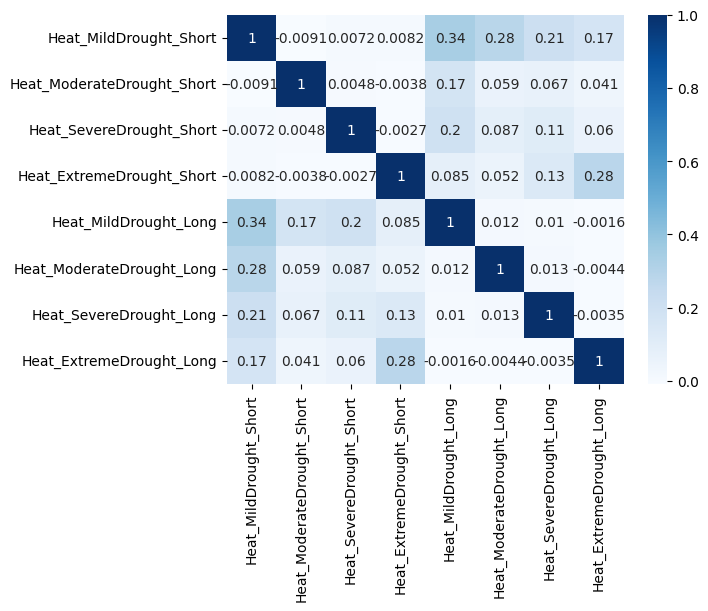

In [165]:
# Check Correlation Between Combined Heat and Drought Variables

print('Heat and Drought Data')
corr_ag_hd = df_ag[['Heat_MildDrought_Short', 'Heat_ModerateDrought_Short',
       'Heat_SevereDrought_Short', 'Heat_ExtremeDrought_Short',
       'Heat_MildDrought_Long', 'Heat_ModerateDrought_Long',
       'Heat_SevereDrought_Long', 'Heat_ExtremeDrought_Long']].corr()
sb.heatmap(corr_ag_hd, cmap="Blues", annot=True)

Heat and Drought Sum Data


<Axes: >

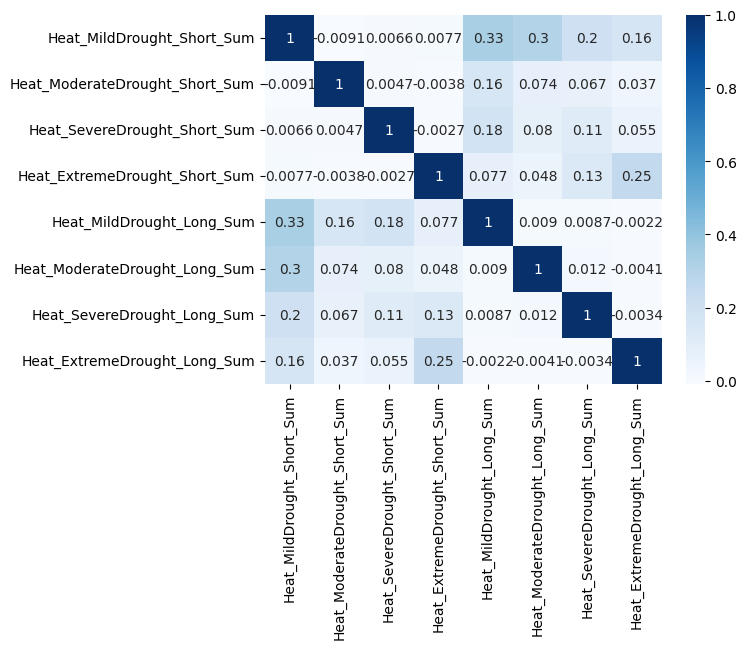

In [166]:
# Check Correlation Between Combined Heat and Drought Sum Variables

print('Heat and Drought Sum Data')
corr_ag_hd_sum = df_ag[['Heat_MildDrought_Short_Sum',
       'Heat_ModerateDrought_Short_Sum', 'Heat_SevereDrought_Short_Sum',
       'Heat_ExtremeDrought_Short_Sum', 'Heat_MildDrought_Long_Sum',
       'Heat_ModerateDrought_Long_Sum', 'Heat_SevereDrought_Long_Sum',
       'Heat_ExtremeDrought_Long_Sum']].corr()
sb.heatmap(corr_ag_hd_sum, cmap="Blues", annot=True)

FAPAR Data


<Axes: >

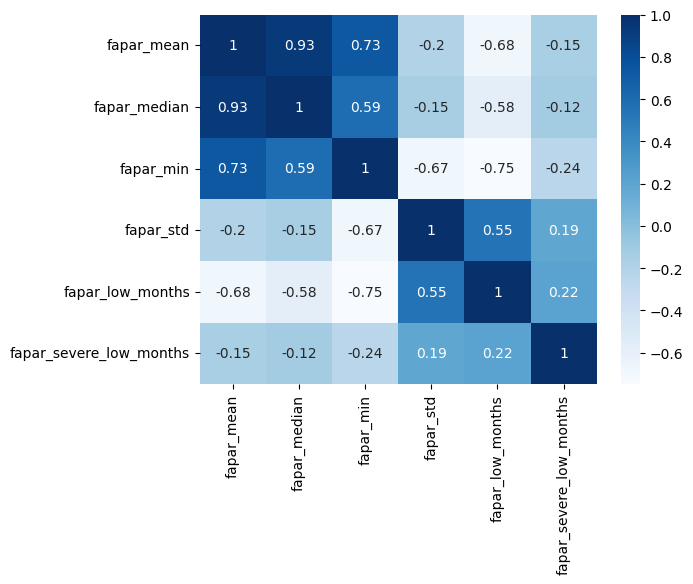

In [167]:
# Check Correlation Between Absorbed Photosynthetically Active Radiation Anomaly Variables

print('FAPAR Data')
corr_ag_fapar = df_ag[['fapar_mean',
       'fapar_median', 'fapar_min', 'fapar_std', 'fapar_low_months',
       'fapar_severe_low_months']].corr()
sb.heatmap(corr_ag_fapar, cmap="Blues", annot=True)

Neighbour Data


<Axes: >

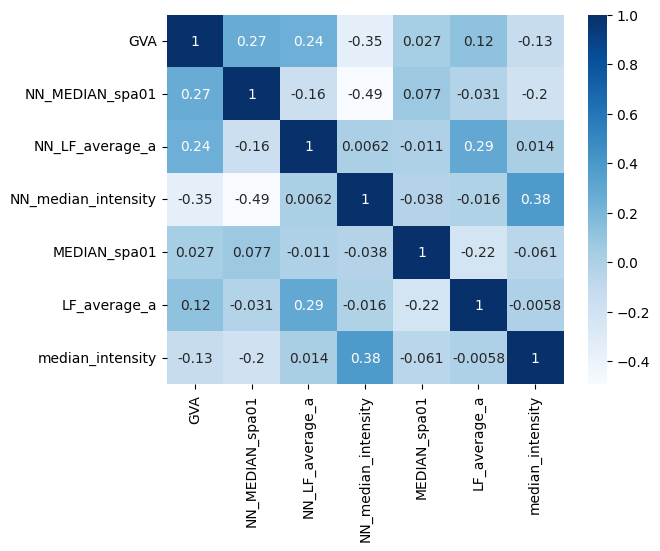

In [172]:
# Check Correlation Between Neighbouring Variables with Agriculture Economic Data

print('Neighbour Data')
corr_ag_nn = df_ag[['GVA', 'NN_MEDIAN_spa01', 'NN_LF_average_a',
       'NN_median_intensity', 'MEDIAN_spa01', 'LF_average_a',
       'median_intensity']].corr()
sb.heatmap(corr_ag_nn, cmap="Blues", annot=True)

Neighbour Data


<Axes: >

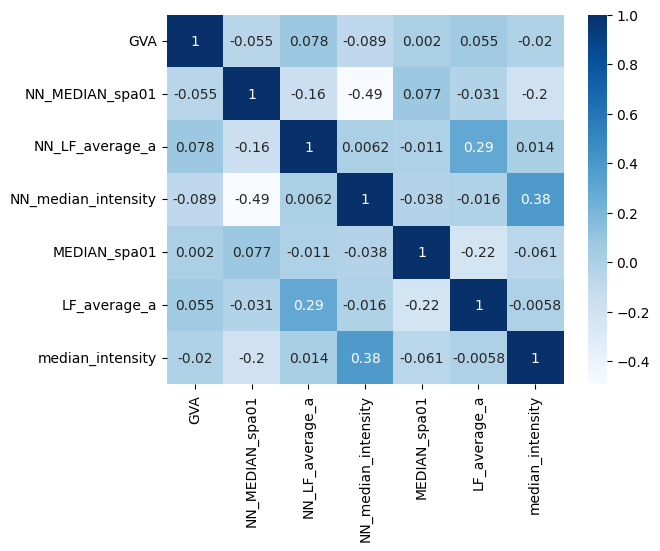

In [173]:
# Check Correlation Between Neighbouring Variables with Industry Economic Data

print('Neighbour Data')
corr_ind_nn = df_ind[['GVA', 'NN_MEDIAN_spa01', 'NN_LF_average_a',
       'NN_median_intensity','MEDIAN_spa01', 'LF_average_a',
       'median_intensity']].corr()
sb.heatmap(corr_ind_nn, cmap="Blues", annot=True)

In [174]:
### Result 

#corr_ag_econ = df_ag[['employment', 'gdp', 'GVA', 'population', 'GVA_share', 'GVAperPOP', 'GVAgrowth',
#       'GVAgrowth_LTA', 'GVAgrowth_Anomaly', 'log gdp', 'log gross value added']].corr()


print('Economic Variables (agriculture and industry)')
print('  keep: gva, gdp, gva growth rate, employment_rate')

print('Heat Variables')
print('  keep: maxTemp_MEDIAN, median_intensity, HeatWave_Count_Sum')

print('Low Flow Index Variables')
print('  keep: LF_average_a, LF_LTA_mean')

print('Standard Precipitation Index Variables')
print('  keep: MEDIAN_spa01, MEDIAN_spa12')

print('Soil Moisture Anomaly')
print('  keep: SMA_MEDIAN_mean, SMA_MEDIAN_std')

print('Combined Heat and Drought Sum Variables')
print('  keep: either values or sum variables')

print('Absorbed Photosynthetically Active Radiation Anomaly Variables')
print('  keep: fapar_mean, fapar_std')

print('Neighborhood Variables')
print('  keep: NN_MEDIAN_spa01, NN_LF_average_a, NN_median_intensity')

Economic Variables (agriculture and industry)
  keep: gva, gdp, gva growth rate, employment_rate
Heat Variables
  keep: maxTemp_MEDIAN, median_intensity, HeatWave_Count_Sum
Low Flow Index Variables
  keep: LF_average_a, LF_LTA_mean
Standard Precipitation Index Variables
  keep: MEDIAN_spa01, MEDIAN_spa12
Soil Moisture Anomaly
  keep: SMA_MEDIAN_mean, SMA_MEDIAN_std
Combined Heat and Drought Sum Variables
  keep: either values or sum variables
Absorbed Photosynthetically Active Radiation Anomaly Variables
  keep: fapar_mean, fapar_std
Neighborhood Variables
  keep: NN_MEDIAN_spa01, NN_LF_average_a, NN_median_intensity
